<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/LS_DS_432_Backprop_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation Practice

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [0]:
import numpy as np
import pandas as pd

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1],
    [0, 0, 0]
])

y = np.array([
    [0],
    [1],
    [1],
    [1],
    [1],
    [0],
    [0]
])

In [0]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [0]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [6]:
nn = Neural_Network()
T = trainer(nn)

T.train(X, y)

Optimization terminated successfully.
         Current function value: 0.333333
         Iterations: 67
         Function evaluations: 80
         Gradient evaluations: 80


In [7]:
print('Predicted Output: \n', nn.forward(X))
print('Loss: \n', np.mean(np.square(y - nn.forward(X))))

Predicted Output: 
 [[5.42827152e-06]
 [6.66661387e-01]
 [9.99999982e-01]
 [6.66661250e-01]
 [9.99666398e-01]
 [6.66661349e-01]
 [1.41241941e-09]]
Loss: 
 0.09523811699029204


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [0]:
# Import tensorflow
import tensorflow as tf
# Import tensorflow's MNIST data handle
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

In [12]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fb308f2d438>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fb2f0311e10>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fb2f0311cc0>)

In [0]:
image_count = 10
data = mnist.train.next_batch(image_count)

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


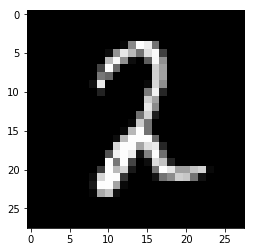

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


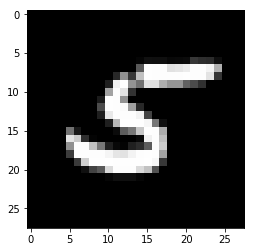

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


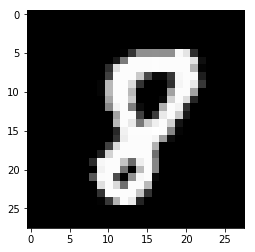

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


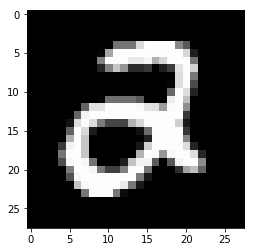

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


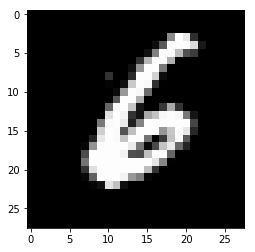

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


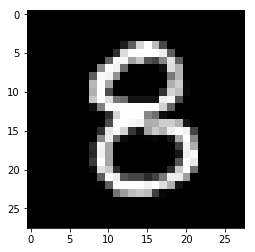

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


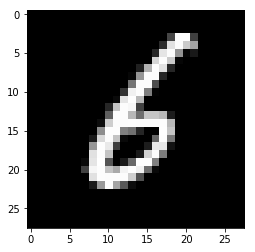

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


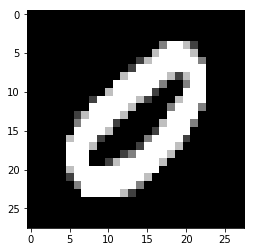

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


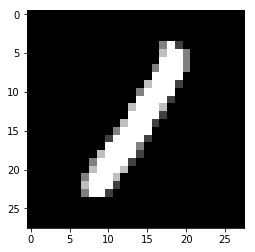

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


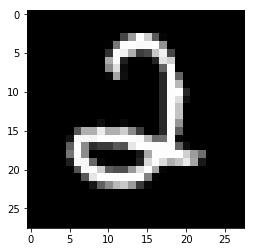

In [11]:
images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

for index, image in enumerate(images):
    print ('Label:', labels[index])
    print ('Digit in the image', np.argmax(labels[index]))
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

In [0]:
X = pd.DataFrame(images.T)

In [24]:
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.085869,0.118773,0.162330,0.198484,0.145078,0.135849,0.106218,0.219728,0.103026,0.125820
std,0.244127,0.295934,0.339953,0.364615,0.321962,0.301509,0.278750,0.397481,0.289786,0.294308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.147059,0.000000,0.000000,0.000000,0.250980,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
pd.DataFrame(labels)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# tutorial from https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
import tensorflow as df

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # loading data from tf api

11493376/11490434 [==============================] - 0s 0us/step


In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

image label: 3


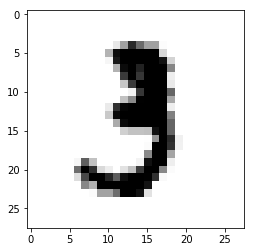

In [33]:
# visualize 10 numbers in the dataset
import matplotlib.pyplot as plt

# get nth image label
image_index = 10
print('image label:',y_train[image_index])

# show nth image
plt.imshow(X_train[image_index], cmap='Greys');

In [34]:
# reshaping arrays for Keras API and normalizing images

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# turn numbers to floats to get decimals after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing by dividing by the max rgb value
X_train /=225
X_test /=225

print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


In [35]:
# importing models from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# create Sequential model and add layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [36]:
# compiling and fitting model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 46s 759us/step - loss: 0.2061 - acc: 0.9384
Epoch 2/10
60000/60000 [==============================] - 45s 743us/step - loss: 0.0850 - acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 44s 739us/step - loss: 0.0585 - acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 44s 733us/step - loss: 0.0460 - acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.0355 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.0303 - acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.0261 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 45s 748us/step - loss: 0.0230 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.0207 - acc: 0.9929
Epoch 10/10
60000/60000 [=========

In [37]:
# evaluating model with X_test and y_test

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 269us/step


[0.062317936565068156, 0.9853]

0


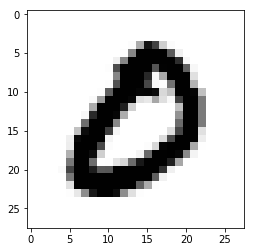

In [44]:
# make predictions on individual inputs

image_index = 6786
plt.imshow(X_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?